Instalamos las librerias a utiliza

In [11799]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import argparse
import openpyxl


Agregamos la base de datos con la cual vamos a trabajar en el proyecto

In [11800]:
#cargamos la base de excel
df = pd.read_excel('C:/Users/jdfr1/Segmentaci-n_inteligente_abogados/Base_Datos.xlsx')
df.head()

,TIPO DE PROCESO,CIUDAD,JGO.,REGION,PRESENTACIÓN DEMANDA,AÑO DEMANDA,RADICADO,RADICADO CONSULTA,RED,TIPO RELACIÓN,...,EMPRESA APODERADO BANCO,% PROVISIÓN Años anteriores,% PROVISIÓN\n2015,TOTAL % PROVISIÓN,HONORARIOS,APODERADO ACTOR,OBSERVACIONES,FOGAFIN,INSTANCIA,CAUSA
0,Ordinario,VALLEDUPAR,3,Caribe,1995-03-01,1995.0,11192,NaN,Colombia,Abogado proceso civil,...,NaN,0.0,NaN,0.0,NaN,NaN,En septiembre de 2006 se envió para el archivo...,NaN,NaN,NaN
1,Ordinario,Bogota,15,Bogotá,1997-02-19,1997.0,8886,NaN,Colombia,Extrabajador,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Ordinario,Bogota,15,Bogotá,1996-01-16,1996.0,8440,NaN,Colombia,Extrabajador,...,NaN,0.0,NaN,0.0,NaN,Jairo Villegas Arbeláez,NaN,NaN,NaN,NaN
3,Ordinario,Bogota,9,Bogotá,1995-07-31,1995.0,22902,NaN,Colombia,Extrabajador,...,NaN,0.0,NaN,0.0,NaN,Jairo Villegas Arbeláez,NaN,NaN,NaN,NaN
4,Ordinario,Bogota,4,Bogotá,1993-11-11,1993.0,33835,NaN,Colombia,Jubilado,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [11801]:
#tamaño de la base
df.shape

(1694, 38)

In [11802]:
#conocemos la estructura de la base
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1694 entries, 0 to 1693
Data columns (total 38 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   TIPO DE PROCESO                                      1693 non-null   object        
 1   CIUDAD                                               1663 non-null   object        
 2   JGO.                                                 1637 non-null   object        
 3   REGION                                               1663 non-null   object        
 4   PRESENTACIÓN DEMANDA                                 1633 non-null   datetime64[ns]
 5   AÑO DEMANDA                                          1642 non-null   float64       
 6   RADICADO                                             1436 non-null   object        
 7   RADICADO CONSULTA                                    958 non-null    object        
 8 

Es interesante evidenciar como tenemos diferentes tipos de datos que pueden ser valiosos para el modelo de clasificación, donde, tenemos datos de fecha para revisar tendencias, tenemos datos enteros, y también tenemos tipo objetc; Además se evidencia un gran reto porque en algunos de los campos se evidencia un volumen alto de nulos.

In [11803]:
#tamaño de la base y los campos
df.shape

(1694, 38)

Haciendo un analisis completo de cada uno de los campos, entendiendo con el experto del negocio, vamos a hacer depuración de algunos de estos

In [11804]:
#Eliminar algunos campos del dataset que no aportan valor al modelo
df = df.drop(columns=['JGO.', 'RADICADO', 'RADICADO CONSULTA', 'MOTIVOS', 'PRIMERA INSTANCIA', 'Fecha Fallo 1a. instancia', 'SEGUNDA INSTANCIA', 'Fecha Fallo 2a. instancia', 'CASACIÓN', 'Fecha Casación', 'MONTO DE LA PROVISION (EN MILLONES) Años anteriores', 'MONTO DE LA PROVISION (EN MILLONES) 2017', 'MONTO TOTAL DE LA PROVISIÓN','FECHA ESTIMADA DE PAGO','EMPRESA APODERADO BANCO','% PROVISIÓN Años anteriores','% PROVISIÓN\n2015','TOTAL % PROVISIÓN','HONORARIOS','APODERADO ACTOR','OBSERVACIONES','FOGAFIN','INSTANCIA','DESCRPICIÓN HECHOS'])

In [11805]:
#Validación de cuantos campos quedan en el dataset final
df.shape

(1694, 14)

Es importante resaltar que pasamos de 38 a 15 campos, la justificación de la depuración de los campos es: son campos que no generan valor al modelo porque son codigos de ubicación del juzgado, son provisiones internas que hace la organización (pero el pago real es el final), campos que más de la mitad de sus registros están nulos.

C:\Users\jdfr1\AppData\Local\Temp\ipykernel_53868\252704829.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='AÑO DEMANDA', palette='viridis')


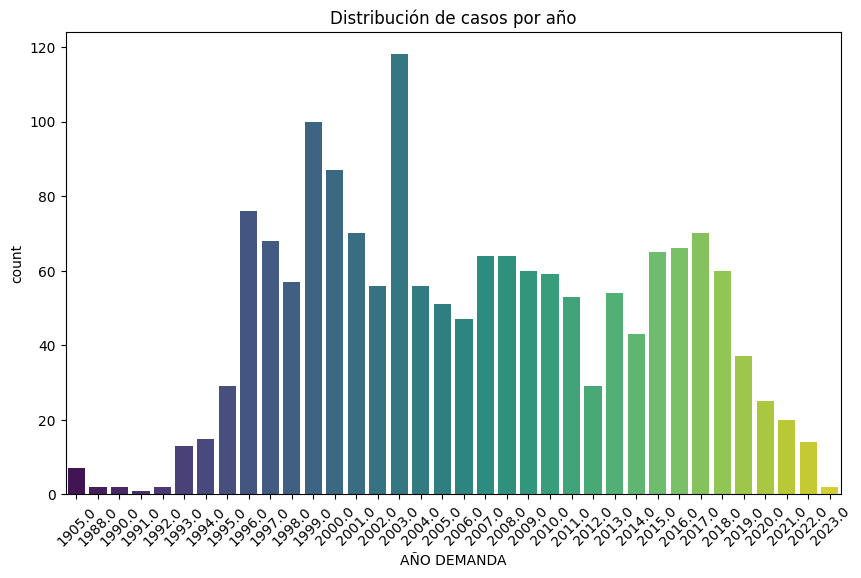

In [11806]:
#grafico con el campo años
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='AÑO DEMANDA', palette='viridis')
plt.title('Distribución de casos por año')
plt.xticks(rotation=45)
plt.show()

In [11807]:
#conozcamos las estadisticas descriptivas de todos los campos
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
TIPO DE PROCESO,1693,19,Ordinario,1466,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CIUDAD,1663,105,Bogota,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
REGION,1663,5,Bogotá,582,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRESENTACIÓN DEMANDA,1633,NaN,NaN,NaN,2006-07-22 04:59:48.977342208,1905-06-23 00:00:00,2000-05-29 00:00:00,2006-03-01 00:00:00,2013-09-30 00:00:00,2023-10-10 00:00:00,NaN
AÑO DEMANDA,1642.0,NaN,NaN,NaN,2006.161998,1905.0,2000.0,2006.0,2013.0,2023.0,10.122314
RED,1660,15,Banco de Colombia,528,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TIPO RELACIÓN,1581,16,Extrabajador,1134,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRETENSIÓN,1658,257,INDEMNIZACION DSJC,217,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CLASE (posibilidad de pérdida),1247,5,Problable,848,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MOTIVOS2,235,16,Con Justa Causa,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Se evidencia un gran reto con los campos por los siguientes motivos:
1. Mucha presencia de datos  nulos
2. Campos categoricos tienen muchos niveles
3. Campos numericos tienen valores negativos
4. La base tiene muchos años de historia, revisando el campo años, se tienen datos desde 1905, entendiendo el contexto, tomaremos datos desde año 2000.

In [11808]:
#Atendiendo los puntos anteriores, se eliminan los años anteriores a 2000, por campo AÑO DEMANDA Y PRESENTACIÓN DEMANDA
df = df[df['AÑO DEMANDA'] >= 2000]
df = df[df['PRESENTACIÓN DEMANDA'].dt.year >= 2000]
df.shape

(1260, 14)

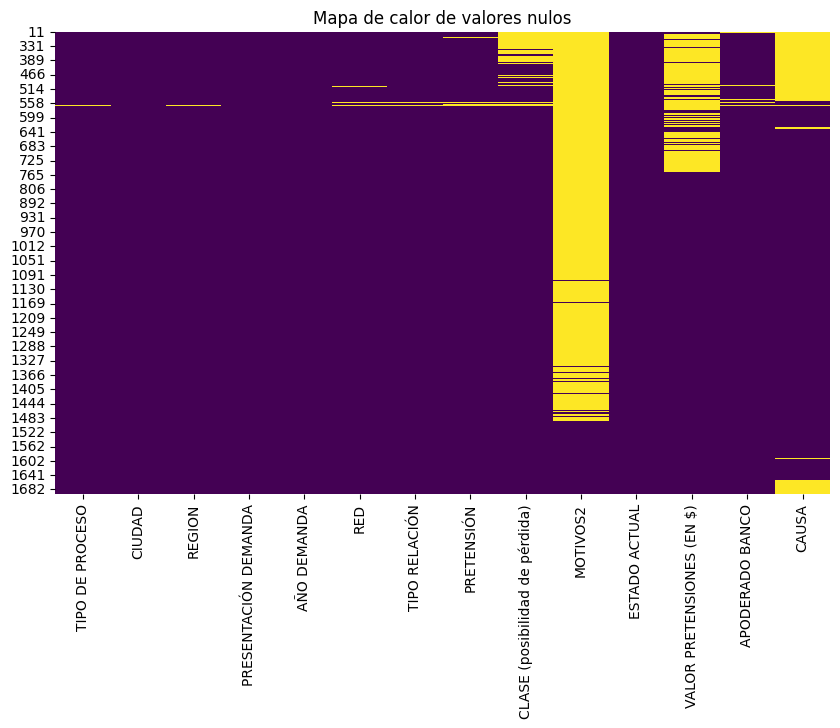

In [11809]:
#analicemos los campos nulos graficamente
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de calor de valores nulos')
plt.show()


De acuerdo al gráfico anterior, se puede afirmar que los campos: Motivos2, valor pretenciones en pesos y causa tienen muchos nulos (alredor del 40%) y si tratamos de imputar con algún método pordríamos estar generando ruido en la variable y por ende en el modelo.

In [11810]:
#eliminamos entonces los campos MOTIVOS2, VALOR PRETENCIONES EN PESOS y CAUSA
df = df.drop(columns=['MOTIVOS2', 'VALOR PRETENSIONES (EN $)', 'CAUSA'])
df.shape


(1260, 11)

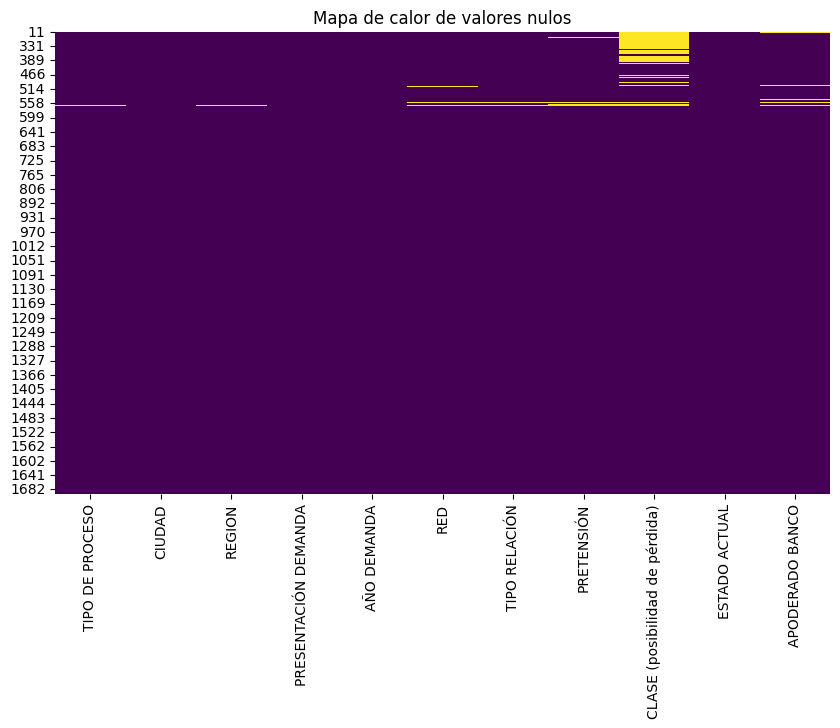

In [11811]:
#Realizamos de nuevo el grafico de nulos
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de calor de valores nulos')
plt.show()

In [11812]:
#Conozcamos a detalle las variables, empecemos por TIPO DE PROCESO
df['TIPO DE PROCESO'].value_counts()

TIPO DE PROCESO
Ordinario          1089
Especial             90
ordinario            25
Ordinario            17
ESPECIAL             12
especial              5
Odinario              4
Unica                 4
Ejecutivo             3
ejecutivo             3
Especial              2
0rdinario             1
Ordinario U.I.        1
Ejecitivo             1
Única Instancia       1
Fuero                 1
Name: count, dtype: int64

In [11813]:
#Es importante homolgar, en este caso, ordinario sería: Ordinario, Ordinario, Ordinario, Odinario, 0rdinario, Ordinario U.I.
#Es importante homolgar, en este caso, Especial sería: ESPECIAL, especial, Especial,ESPECIAL,
#Es importante homolgar, en este caso, Ejecutivo sería: ejecutivo, Ejecitivo
#El resto de casos homologarlos en Unico, sería:Unica, Única Instancia, Fuero 
df['TIPO DE PROCESO'] = df['TIPO DE PROCESO'].replace({'ordinario': 'Ordinario', 'Ordinario ': 'Ordinario', 'Odinario': 'Ordinario', '0rdinario': 'Ordinario', 'Ordinario U.I.': 'Ordinario'})
df['TIPO DE PROCESO'] = df['TIPO DE PROCESO'].replace({'ESPECIAL': 'Especial', 'especial': 'Especial', 'Especial ': 'Especial'})
df['TIPO DE PROCESO'] = df['TIPO DE PROCESO'].replace({'ejecutivo': 'Ejecutivo', 'Ejecitivo': 'Ejecutivo'})
df['TIPO DE PROCESO'] = df['TIPO DE PROCESO'].replace({'Unica': 'Unico', 'Única Instancia': 'Unico', 'Fuero ': 'Unico'})
df['TIPO DE PROCESO'].value_counts()

TIPO DE PROCESO
Ordinario    1137
Especial      109
Ejecutivo       7
Unico           6
Name: count, dtype: int64

In [11814]:
#revisamos los nulos del campo TIPO DE PROCESO
df['TIPO DE PROCESO'].isnull().sum()

np.int64(1)

In [11815]:
#Imputamos los nulos del campo TIPO DE PROCESO con la moda
df['TIPO DE PROCESO'] = df['TIPO DE PROCESO'].fillna(df['TIPO DE PROCESO'].mode()[0])   
#Validamos la imputación del campo TIPO DE PROCESO
df['TIPO DE PROCESO'].isnull().sum()

np.int64(0)

C:\Users\jdfr1\AppData\Local\Temp\ipykernel_53868\2488937106.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='TIPO DE PROCESO', palette='viridis', order=df['TIPO DE PROCESO'].value_counts().index)


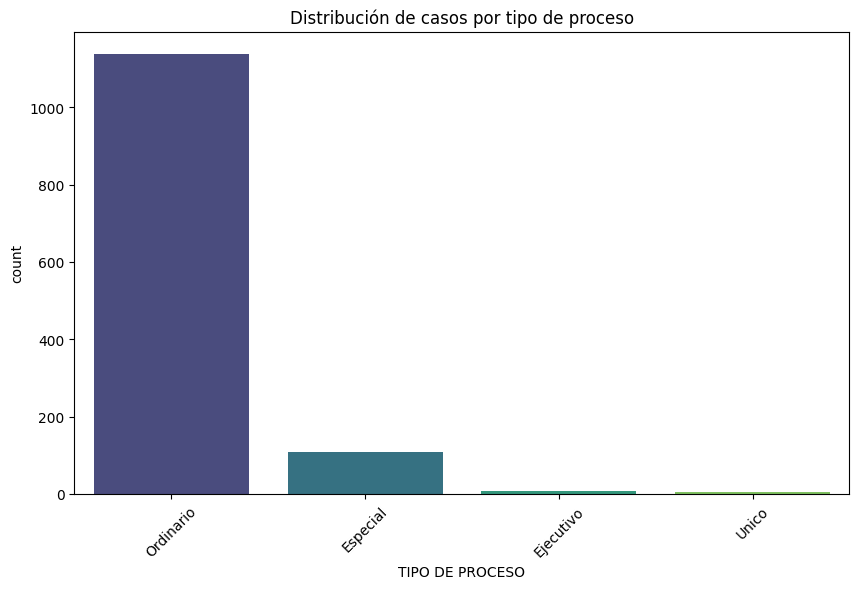

In [11816]:
#Finalmente, graficamos la distribución de los casos por tipo de proceso
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='TIPO DE PROCESO', palette='viridis', order=df['TIPO DE PROCESO'].value_counts().index)
plt.title('Distribución de casos por tipo de proceso')
plt.xticks(rotation=45)
plt.show()


In [11817]:
df = df.rename(columns={'TIPO DE PROCESO': 'TIPO_DE_PROCESO'})

In [11818]:
#relaizamos ananlisis y conteo de la variable ciudad

#convertimos a minusculas
df['CIUDAD'] = df['CIUDAD'].str.lower()

#imputamos los nulos con la moda
df['CIUDAD'] = df['CIUDAD'].fillna(df['CIUDAD'].mode()[0])

In [11819]:
df['CIUDAD'].value_counts()

CIUDAD
bogota          334
medellin        258
cali             63
cucuta           52
barranquilla     50
               ... 
socorro           1
malaga            1
pto. berrio       1
garagoa           1
cali              1
Name: count, Length: 86, dtype: int64

C:\Users\jdfr1\AppData\Local\Temp\ipykernel_53868\1674130605.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['CIUDAD'].isin(top_10_ciudades)], y='CIUDAD', palette='viridis', order=top_10_ciudades)


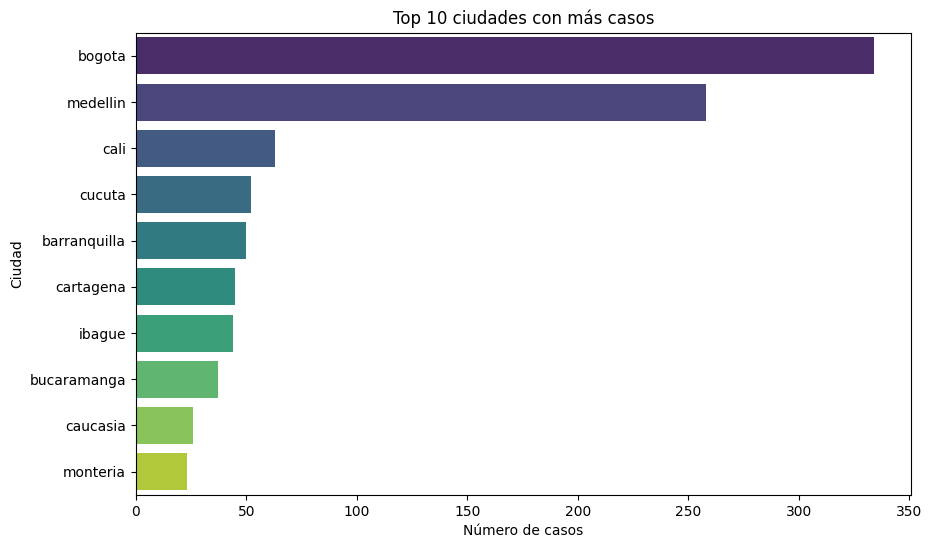

In [11820]:
#realizamos grafica de barras para el top 10 de la  variable ciudad
plt.figure(figsize=(10,6))
top_10_ciudades = df['CIUDAD'].value_counts().nlargest(10).index
sns.countplot(data=df[df['CIUDAD'].isin(top_10_ciudades)], y='CIUDAD', palette='viridis', order=top_10_ciudades)
plt.title('Top 10 ciudades con más casos')  
plt.xlabel('Número de casos')
plt.ylabel('Ciudad')
plt.show()



In [11821]:
#hacer un conteo por cada ciudad
df['CIUDAD'].value_counts()


CIUDAD
bogota          334
medellin        258
cali             63
cucuta           52
barranquilla     50
               ... 
socorro           1
malaga            1
pto. berrio       1
garagoa           1
cali              1
Name: count, Length: 86, dtype: int64

In [11822]:
#conocer el campo región e identificar si tiene campo nulos
df['REGION'].isnull().sum()

np.int64(1)

In [11823]:
#Imputamos los nulos del campo REGION con la moda
df['REGION'] = df['REGION'].fillna(df['REGION'].mode()[0])
#Validamos la imputación del campo REGION
df['REGION'].isnull().sum()

np.int64(0)

C:\Users\jdfr1\AppData\Local\Temp\ipykernel_53868\1974913234.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='REGION', palette='viridis', order=df['REGION'].value_counts().index)


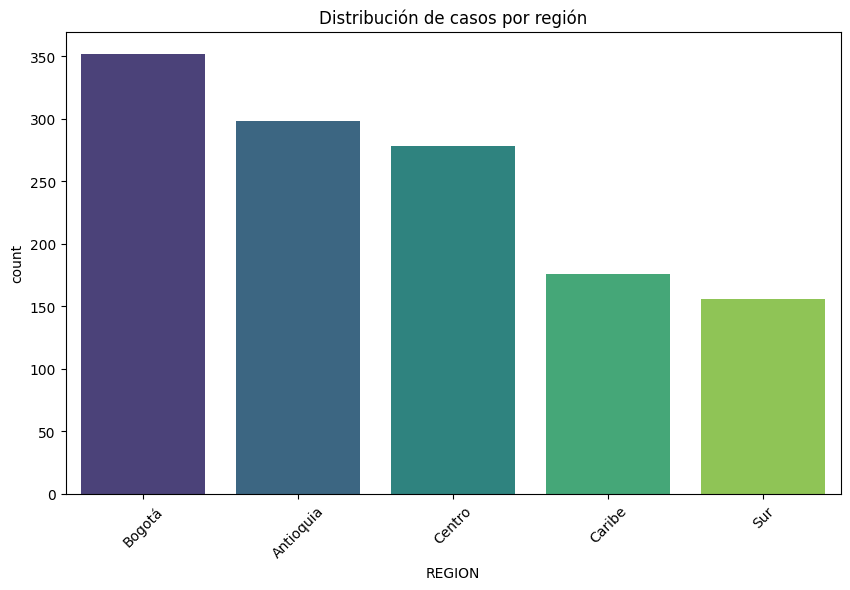

In [11824]:
#Conozcamos el campo REGION,  a continuación grafico de la distribución:
df['REGION'].value_counts()
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='REGION', palette='viridis', order=df['REGION'].value_counts().index)
plt.title('Distribución de casos por región')
plt.xticks(rotation=45)
plt.show()


In [11825]:
#Vamos a analizar los campos de fecha que tenemos en el dataset, tenemos el campo PRESENTACIÓN DE DEMANDA y AÑO DE DEMANDA,  realmente son campos que pueden ser complementarios, aunque con la fecha completa podríamos encontrar tendencias a través de los meses.
#Empecemos analizando el AÑO DE DEMANDA
df['AÑO DEMANDA'].value_counts()


AÑO DEMANDA
2003.0    117
2000.0     87
2001.0     70
2017.0     69
2016.0     66
2015.0     65
2008.0     64
2007.0     64
2018.0     60
2010.0     59
2009.0     59
2004.0     56
2002.0     56
2013.0     54
2011.0     51
2005.0     50
2006.0     47
2014.0     41
2019.0     36
2012.0     29
2020.0     25
2021.0     20
2022.0     13
2023.0      2
Name: count, dtype: int64

In [11826]:
#convertir el campo AÑO DEMANDA a entero
df['AÑO DEMANDA'] = df['AÑO DEMANDA'].astype(int)


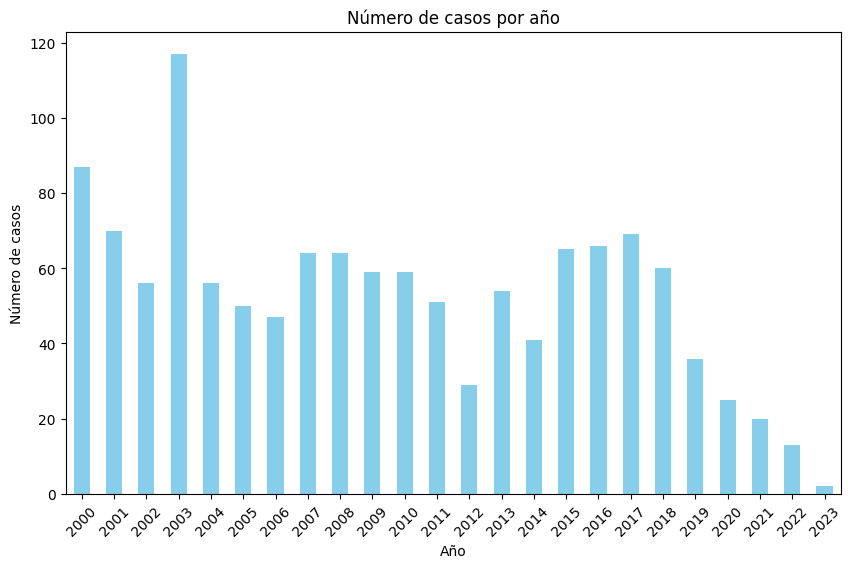

In [11827]:
#Se evidencia en el gráfico anterior que no tenemos año nulos, por lo tanto no es necesario hacer ninguna imputación, ahora conozcamos el volumen de casos por año 
df['AÑO DEMANDA'].value_counts().sort_index().plot(kind='bar', figsize=(10,6), color='skyblue')
plt.title('Número de casos por año')
plt.xlabel('Año')
plt.ylabel('Número de casos')
plt.xticks(rotation=45)
plt.show()


In [11828]:
#El AÑO DE DEMANDA es un campo importante para el analisis y nos permitirá ver evolución de los casos en el tiempo, ahora vamos a ver el campo de PRESENTACIÓN DE DEMANDA, primero identificamos los vacios
df['PRESENTACIÓN DEMANDA'].isnull().sum()



np.int64(0)

In [11829]:
df = df.drop(columns=['PRESENTACIÓN DEMANDA'])

In [11830]:
#Vamos a analizar el campo RED, vamos a conocer que información tiene el campo
df['RED'].value_counts()


RED
Banco de Colombia              466
Bancolombia                    398
Colombia                       102
BIC                            100
Conavi                          79
Ninguno                         58
bic                             20
conavi                          19
Bic                              4
Sin establecer                   4
Leasing                          4
CORFINSURA                       1
Banco Industrial Colombiano      1
Name: count, dtype: int64

In [11831]:
#Se puede evidencia que este campo tiene problemas de homolagación, por lo tanto se decide homologar el campo con las clases que efectivamente deberían tener, para este caso: sería:
#El campo Bancolombia, sería: Bancolombia, Colombia, Leasing
df['RED'] = df['RED'].replace({'Colombia ': 'Bancolombia', 'Bancolombia ': 'Bancolombia', 'Leasing': 'Bancolombia', 'Colombia': 'Bancolombia'})


#El campo BIC, sería: BIC, bic, Bic
df['RED'] = df['RED'].replace({'BIC': 'BIC', 'bic': 'BIC', 'Bic': 'BIC'})

#El campo Conavi, sería: Conavi, conavi, 
df['RED'] = df['RED'].replace({'Conavi': 'Conavi', 'Conavi': 'conavi'})

#El campo otros, sería: Ninguno, Sin establecer, CORFINSURA, Banco industrial Colombiano,Banco Industrial Colombiano
df['RED'] = df['RED'].replace({'Sin establecer': 'Otros', 'CORFINSURA': 'Otros', 'Ninguno': 'Otros', 'Banco industrial Colombia': 'Otros','Banco Industrial Colombiano': 'Otros'})



In [11832]:
df['RED'].value_counts()

RED
Bancolombia          504
Banco de Colombia    466
BIC                  124
conavi                98
Otros                 64
Name: count, dtype: int64

In [11833]:
#validamos los nulos del campo RED
df['RED'].isnull().sum()

np.int64(4)

In [11834]:
#los 4 nulos los vamos a imputar con la moda
df['RED'] = df['RED'].fillna(df['RED'].mode()[0])

In [11835]:
#Validamos la imputación del campo RED
df['RED'].isnull().sum()

np.int64(0)

C:\Users\jdfr1\AppData\Local\Temp\ipykernel_53868\51525961.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='RED', palette='viridis', order=df['RED'].value_counts().index)


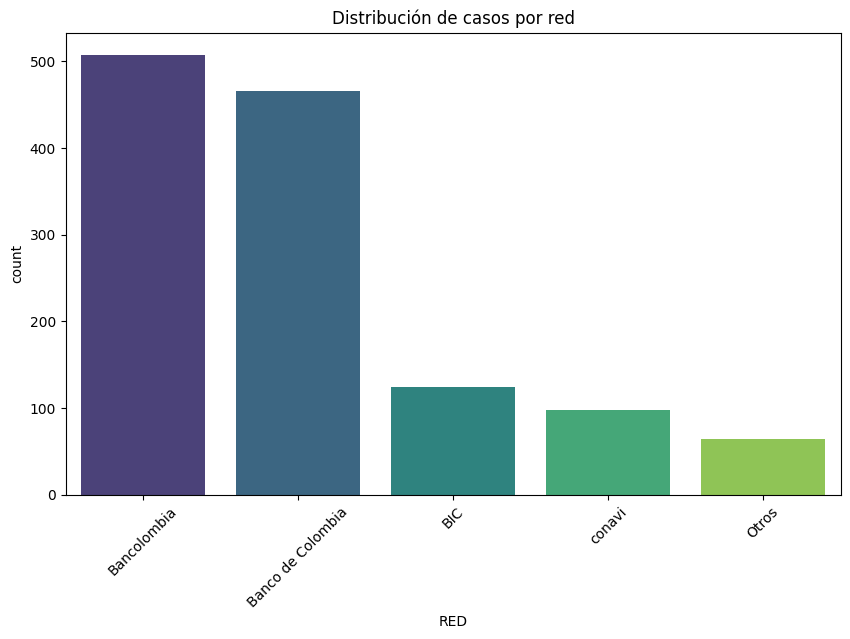

In [11836]:
#después de todo el proceso de limpieza, graficamos el campo para conocer su distribución
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='RED', palette='viridis', order=df['RED'].value_counts().index)
plt.title('Distribución de casos por red')              
plt.xticks(rotation=45)
plt.show()


In [11837]:
#Conozcamos a detalle el campo TIPO RELACIÓN
df['TIPO RELACIÓN'].value_counts()

TIPO RELACIÓN
Extrabajador     935
Trabajador       190
Ninguna           58
Jubilado          48
trabajador        10
Sobreviviente     10
Gestor             3
Corretaje          1
conavi             1
ninguna            1
Name: count, dtype: int64

In [11838]:
#Se puede evidenciar que el campo tiene muchas clases que se deben homologar, teniendo en cuenta:
#El campo Jubilado, debe incluir: Extrabajador, Jubilado
df['TIPO RELACIÓN'] = df['TIPO RELACIÓN'].replace({'Extrabajador': 'Jubilado', 'Jubilado ': 'Jubilado'})

#El campo empleados, debe incluir:Trabajador, trabajador
df['TIPO RELACIÓN'] = df['TIPO RELACIÓN'].replace({'Trabajador': 'Empleado', 'trabajador': 'Empleado'})

#El resto de las clases, deben incluirse en Otros: Ninguna, Sobreviviente, Gestor, Corretaje, conavi, ninguna,
df['TIPO RELACIÓN'] = df['TIPO RELACIÓN'].replace({'Ninguna': 'Otros', 'Sobreviviente': 'Otros', 'Gestor': 'Otros', 'Corretaje': 'Otros', 'conavi': 'Otros', 'ninguna': 'Otros'})


In [11839]:
#validar finalmene como quedan las clases:
df['TIPO RELACIÓN'].value_counts()

TIPO RELACIÓN
Jubilado    983
Empleado    200
Otros        74
Name: count, dtype: int64

In [11840]:
#identificar si hay nulos en el campo TIPO RELACIÓN
df['TIPO RELACIÓN'].isnull().sum()

np.int64(3)

In [11841]:
#Los 3 nulos los vamos a imputar con la moda
df['TIPO RELACIÓN'] = df['TIPO RELACIÓN'].fillna(df['TIPO RELACIÓN'].mode()[0]) 

In [11842]:
#Validamos la imputacion
df['TIPO RELACIÓN'].isnull().sum()

np.int64(0)

In [11843]:
df = df.rename(columns={'TIPO RELACIÓN': 'TIPO_RELACION'})

C:\Users\jdfr1\AppData\Local\Temp\ipykernel_53868\3878690451.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='TIPO_RELACION', palette='viridis', order=df['TIPO_RELACION'].value_counts().index)


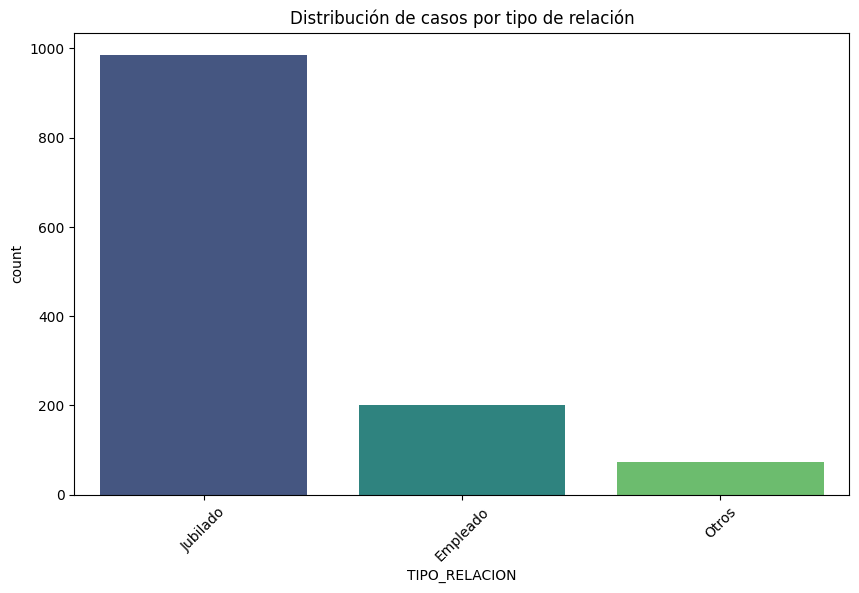

In [11844]:
#después de realizar todo el proceso de limpieza del campo TIPO RELACIÓN, graficamos la distribución de los casos
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='TIPO_RELACION', palette='viridis', order=df['TIPO_RELACION'].value_counts().index)
plt.title('Distribución de casos por tipo de relación')
plt.xticks(rotation=45)
plt.show()


In [11845]:
#Vamos a conocer el campo PRETENCIÓN, conozcamos las clases que tiene
df['PRETENSIÓN'].value_counts()


PRETENSIÓN
INDEMNIZACION DSJC                                    213
Jubilacion                                             89
INDEMNIZACIÓN DSJC                                     89
Indemnizacion dsjc                                     70
TITULO PENSIONAL - COTIZACIÓN AL ISS                   61
                                                     ... 
RELIQUIDACIÓN PRESTACIONES SOCIALES                     1
INDEMNIZACION DSJC - MORATORIA                          1
REINTEGRO Y RELIQUIDACIÓN DE PRESTACIONES SOCIALES      1
REINTEGRO - CASO SALUD                                  1
BENEFICIOS CONVENCIONALES                               1
Name: count, Length: 156, dtype: int64

In [11846]:
#Convertir todos los registros del campo en minuscula
df['PRETENSIÓN'] = df['PRETENSIÓN'].str.lower()

In [11847]:
#Vamos a conocer el campo PRETENCIÓN, conozcamos las clases que tiene
df['PRETENSIÓN'].value_counts()


PRETENSIÓN
indemnizacion dsjc                                    286
jubilacion                                            141
indemnización dsjc                                     89
titulo pensional - cotización al iss                   61
accion reintegro                                       53
                                                     ... 
reliquidación prestaciones sociales                     1
indemnizacion dsjc - moratoria                          1
reintegro y reliquidación de prestaciones sociales      1
reintegro - caso salud                                  1
beneficios convencionales                               1
Name: count, Length: 143, dtype: int64

In [11848]:
#Limpieza del campo
df.loc[df['PRETENSIÓN'].str.contains("reintegro", case=False, na=False), 'PRETENSIÓN'] = "reintegro"
df.loc[df['PRETENSIÓN'].str.contains("jubilacion", case=False, na=False), 'PRETENSIÓN'] = "jubilacion"
df.loc[df['PRETENSIÓN'].str.contains("beneficios", case=False, na=False), 'PRETENSIÓN'] = "beneficios"
df.loc[df['PRETENSIÓN'].str.contains("fuero sindical", case=False, na=False), 'PRETENSIÓN'] = "fuero sindical"
df.loc[df['PRETENSIÓN'].str.contains("salario", case=False, na=False), 'PRETENSIÓN'] = "salario"
df.loc[df['PRETENSIÓN'].str.contains("prestaciones sociales", case=False, na=False), 'PRETENSIÓN'] = "prestaciones sociales"
df.loc[df['PRETENSIÓN'].str.contains("indemnizacion", case=False, na=False), 'PRETENSIÓN'] = "indemnización"
df.loc[df['PRETENSIÓN'].str.contains("indemnización", case=False, na=False), 'PRETENSIÓN'] = "indemnización"
df.loc[df['PRETENSIÓN'].str.contains("contrato", case=False, na=False), 'PRETENSIÓN'] = "contrato"
df.loc[df['PRETENSIÓN'].str.contains("pensión", case=False, na=False), 'PRETENSIÓN'] = "pensión"

In [11849]:
#Vamos a conocer el campo PRETENCIÓN, conozcamos las clases que tiene
df['PRETENSIÓN'].value_counts()


PRETENSIÓN
indemnización                       454
reintegro                           155
jubilacion                          141
fuero sindical                      100
salario                              65
                                   ... 
indeminización dsjc                   1
nulidad de proceso disciplinario      1
pago cesantías retroactivas           1
reloquidación mesada pensional        1
beneficios                            1
Name: count, Length: 64, dtype: int64

In [11850]:
# Organizar las clases del campo PRETENSIÓN
clases_principales = ['indemnización', 'reintegro', 'jubilacion', 'fuero sindical', 'salario']
df['PRETENSIÓN'] = df['PRETENSIÓN'].apply(lambda x: x if x in clases_principales else 'otros')
df['PRETENSIÓN'].value_counts()

PRETENSIÓN
indemnización     454
otros             345
reintegro         155
jubilacion        141
fuero sindical    100
salario            65
Name: count, dtype: int64

In [11851]:
#los 6 campos nulos los vamos a imputar con la moda
df['PRETENSIÓN'] = df['PRETENSIÓN'].fillna(df['PRETENSIÓN'].mode()[0])

#Validamos la imputación del campo PRETENSIÓN
df['PRETENSIÓN'].isnull().sum()

np.int64(0)

In [11852]:
#Analizamos el campo CLASE (posibilidad de pérdida), identificamos los campos nulos
df['CLASE (posibilidad de pérdida)'].isnull().sum()

np.int64(95)

In [11853]:
#hemos identificado 95 campos nulos, siguiendo con el mismo criterio, vamos a imputar con la moda
df['CLASE (posibilidad de pérdida)'] = df['CLASE (posibilidad de pérdida)'].fillna(df['CLASE (posibilidad de pérdida)'].mode()[0])  
#Validamos la imputación del campo CLASE (posibilidad de pérdida)
df['CLASE (posibilidad de pérdida)'].isnull().sum()

np.int64(0)

In [11854]:
#conocemos las clases de este campo
df['CLASE (posibilidad de pérdida)'].value_counts()

CLASE (posibilidad de pérdida)
Problable                                                                              864
Eventual                                                                               356
Remota                                                                                  39
el ersultado es muy inciertoy  por tanto la probailidad de fallo adverso es latente      1
Name: count, dtype: int64

In [11855]:
#de acuerdo a la descripción de cada clase, se identifica la necesidad de homogar y dejar solo 3 clases, probable, eventual y retoma, así que hacemos los siguientes cambios:
#El campo probable, incluiría: Problable, el ersultado es muy inciertoy  por tanto la probailidad de fallo adverso es latente
df['CLASE (posibilidad de pérdida)'] = df['CLASE (posibilidad de pérdida)'].replace({'Problable': 'probable', 'el ersultado es muy inciertoy  por tanto la probailidad de fallo adverso es latente': 'probable'})


#valimos como queda el campo
df['CLASE (posibilidad de pérdida)'].value_counts()



CLASE (posibilidad de pérdida)
probable    865
Eventual    356
Remota       39
Name: count, dtype: int64

In [11856]:
df = df.rename(columns={'CLASE (posibilidad de pérdida)': 'CLASE'})

In [11857]:
#Entendamos el campo ESTADO ACTUAL, lo primero es convertir todo en minuscula
#Convertir todos los registros del campo en minuscula
df['ESTADO ACTUAL'] = df['ESTADO ACTUAL'].str.lower()

In [11858]:
#Vamos a conocer el campo ESTADO ACTUAL, conozcamos las clases que tiene
df['ESTADO ACTUAL'].value_counts()

ESTADO ACTUAL
favorable 2005                                                                                                                                                                                                                                                                                                                                                                                                                                  55
favorable 2006                                                                                                                                                                                                                                                                                                                                                                                                                                  39
favorable 2004                                                                                                      

In [11859]:
#Realizamos la Limpieza del campo
df.loc[df['ESTADO ACTUAL'].str.contains("conciliado", case=False, na=False), 'ESTADO ACTUAL'] = "conciliado"
df.loc[df['ESTADO ACTUAL'].str.contains("favorable", case=False, na=False), 'ESTADO ACTUAL'] = "favorable"
df.loc[df['ESTADO ACTUAL'].str.contains("desfavorable", case=False, na=False), 'ESTADO ACTUAL'] = "desfavorable"
df.loc[df['ESTADO ACTUAL'].str.contains("contestada", case=False, na=False), 'ESTADO ACTUAL'] = "contestada"
df.loc[df['ESTADO ACTUAL'].str.contains("pendiente", case=False, na=False), 'ESTADO ACTUAL'] = "pendiente"
df.loc[df['ESTADO ACTUAL'].str.contains("neutro", case=False, na=False), 'ESTADO ACTUAL'] = "neutro"
df.loc[df['ESTADO ACTUAL'].str.contains("terminado", case=False, na=False), 'ESTADO ACTUAL'] = "terminado"
df.loc[df['ESTADO ACTUAL'].str.contains("fallo 2a instancia", case=False, na=False), 'ESTADO ACTUAL'] = "fallo 2a instancia"
df.loc[df['ESTADO ACTUAL'].str.contains("segunda instancia", case=False, na=False), 'ESTADO ACTUAL'] = "segunda instancia"
df.loc[df['ESTADO ACTUAL'].str.contains("radica contestacion", case=False, na=False), 'ESTADO ACTUAL'] = "radica contestacion"
df.loc[df['ESTADO ACTUAL'].str.contains("liquidación", case=False, na=False), 'ESTADO ACTUAL'] = "liquidación"
df.loc[df['ESTADO ACTUAL'].str.contains("apelación demandante", case=False, na=False), 'ESTADO ACTUAL'] = "apelación demandante"
df.loc[df['ESTADO ACTUAL'].str.contains("resuelto", case=False, na=False), 'ESTADO ACTUAL'] = "resuelto"
df.loc[df['ESTADO ACTUAL'].str.contains("fallo 1era instancia", case=False, na=False), 'ESTADO ACTUAL'] = "fallo 1era instancia"
df.loc[df['ESTADO ACTUAL'].str.contains("primera instancia", case=False, na=False), 'ESTADO ACTUAL'] = "primera instancia"



In [11860]:
# Organizar las clases del campo ESTADO ACTUA
clases_principales = ['conciliado', 'favorable', 'desfavorable', 'contestada', 'pendiente', 'neutro', 'terminado', 'fallo 2a instancia', 'segunda instancia', 'radica contestacion', 'liquidación', 'apelación demandante', 'resuelto', 'fallo 1era instancia', 'primera instancia']
df['ESTADO ACTUAL'] = df['ESTADO ACTUAL'].apply(lambda x: x if x in clases_principales else 'otros')
df['ESTADO ACTUAL'].value_counts()

ESTADO ACTUAL
otros                  456
pendiente              222
favorable              213
contestada             193
liquidación             51
terminado               47
conciliado              27
fallo 2a instancia      19
segunda instancia        9
primera instancia        7
resuelto                 7
neutro                   5
radica contestacion      4
Name: count, dtype: int64

In [11861]:
#Vamos a conocer el campo ESTADO ACTUAL, conozcamos las clases que tiene
df['ESTADO ACTUAL'].value_counts()


ESTADO ACTUAL
otros                  456
pendiente              222
favorable              213
contestada             193
liquidación             51
terminado               47
conciliado              27
fallo 2a instancia      19
segunda instancia        9
primera instancia        7
resuelto                 7
neutro                   5
radica contestacion      4
Name: count, dtype: int64

In [11862]:
df = df.rename(columns={'ESTADO ACTUAL': 'ESTADO_ACTUAL'})

In [11863]:
#Entender el campo APODERADO BANCO, el cual es muy importante para el análisis porque es el nombre del abogado que atiende el proceso, primero validamos los nulos
df['APODERADO BANCO'].isnull().sum()

np.int64(9)

In [11864]:
#Imputar los 9 casos nulos con la moda, según el caso anterior:
df['APODERADO BANCO'] = df['APODERADO BANCO'].fillna(df['APODERADO BANCO'].mode()[0])

In [11865]:
#Validamos de nuevo los nulos
df['APODERADO BANCO'].isnull().sum()

np.int64(0)

In [11866]:
#Entender la distribución de los casos por APODERADO BANCO
df['APODERADO BANCO'].value_counts()

APODERADO BANCO
José Roberto Herrera Vergara                                             219
Humberto Jairo Jaramillo V.                                              135
Carlos Valega Puello                                                      78
Charria & Camacho Abogados Asociados Limitada <chacalop@cable.net.co>     68
Juan Pablo López Moreno                                                   55
                                                                        ... 
José Roberto Herrera  (Xiomara Clavijo)                                    1
Oscar Vergel Canal (José Roberto Herrera V.)                               1
José Roberto Herrera Vergara   (Juan Felipe Molina Alvarez)                1
José Roberto Herrera Vergara (Orlando Erickson Rivera Ramírez)             1
José Roberto Herrera Vergara. (Giovanna Flórez Montealegre)                1
Name: count, Length: 102, dtype: int64

En el paso anterior se evidencia muchos nombres que tienen diferente forma de escribir, y analizando de cara al modelo es un campo que no va a generar valor, en ese sentido, se decide eliminar el campo

In [11867]:
#Eiminar el campo APODERADO BANCO del dataset
df = df.drop(columns=['APODERADO BANCO'])

In [11868]:
#Vamos a validar que ya no tengamos nulos en el dataset
df.isnull().sum()

TIPO_DE_PROCESO    0
CIUDAD             0
REGION             0
AÑO DEMANDA        0
RED                0
TIPO_RELACION      0
PRETENSIÓN         0
CLASE              0
ESTADO_ACTUAL      0
dtype: int64

Después del proceso de limpieza y validación de cada uno de los campo (importante en el proceso - ETL), Validamos finalmente toda la base de datos y seguimos con el analisis del EDA

## 1 Hacemos un EDA, y así entendemos los datos

In [11869]:
#Revisamos la estructura final del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1260 entries, 11 to 1693
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TIPO_DE_PROCESO  1260 non-null   object
 1   CIUDAD           1260 non-null   object
 2   REGION           1260 non-null   object
 3   AÑO DEMANDA      1260 non-null   int64 
 4   RED              1260 non-null   object
 5   TIPO_RELACION    1260 non-null   object
 6   PRETENSIÓN       1260 non-null   object
 7   CLASE            1260 non-null   object
 8   ESTADO_ACTUAL    1260 non-null   object
dtypes: int64(1), object(8)
memory usage: 98.4+ KB


Según el cuadro anterior, podemos evidenciar que ya no tenemos nulos

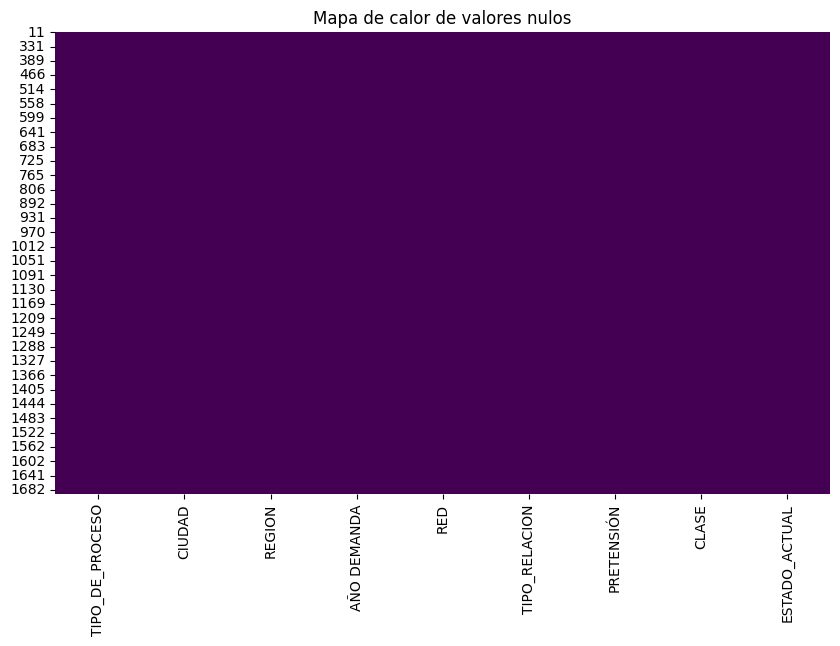

In [11870]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de calor de valores nulos')
plt.show()

In [11871]:
#Analizaremos la descripción de cada uno de los campos que tenemos en el dataset
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
TIPO_DE_PROCESO,1260,4,Ordinario,1138,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CIUDAD,1260,86,bogota,334,NaN,NaN,NaN,NaN,NaN,NaN,NaN
REGION,1260,5,Bogotá,352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AÑO DEMANDA,1260.0,NaN,NaN,NaN,2009.345238,6.341664,2000.0,2003.0,2009.0,2015.0,2023.0
RED,1260,5,Bancolombia,508,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TIPO_RELACION,1260,3,Jubilado,986,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRETENSIÓN,1260,6,indemnización,454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CLASE,1260,3,probable,865,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESTADO_ACTUAL,1260,13,otros,456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Se evidencia una concentración en el tipo de proceso: ordinario, y este fenomeno se da para todos los años analizados (periodo del 2020 al 2023)

<Axes: xlabel='AÑO DEMANDA'>

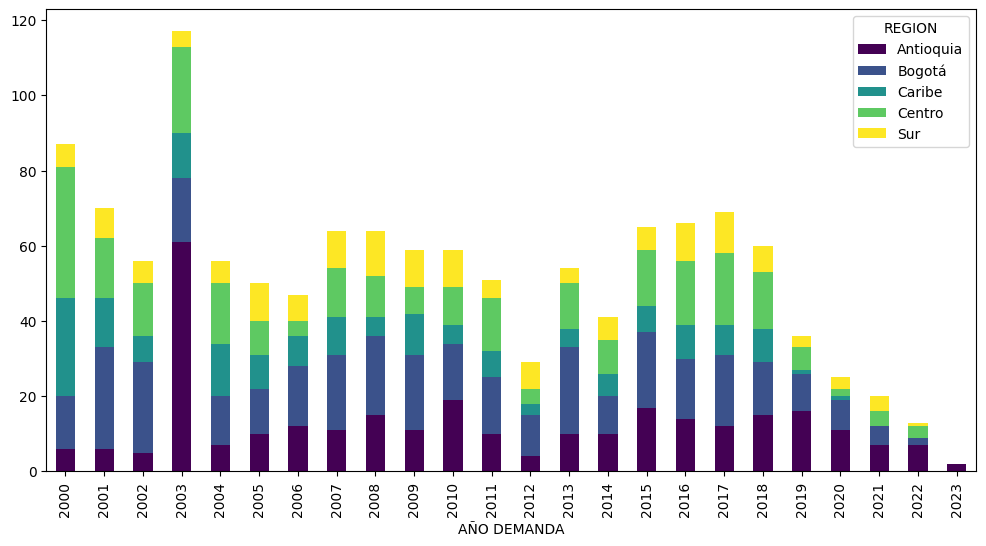

In [11872]:
#Ahora, analizamos el campo AÑO DEMANDA por región
df.groupby(['AÑO DEMANDA', 'REGION']).size().unstack().plot(kind='bar', stacked=True, figsize=(12,6), colormap='viridis')   

Es importante resaltar que en todos los años existe una distribución proporcional por todos los años, se evidencia una leve concentración en las ciudades de Antioquia y bogotá

<Axes: xlabel='AÑO DEMANDA'>

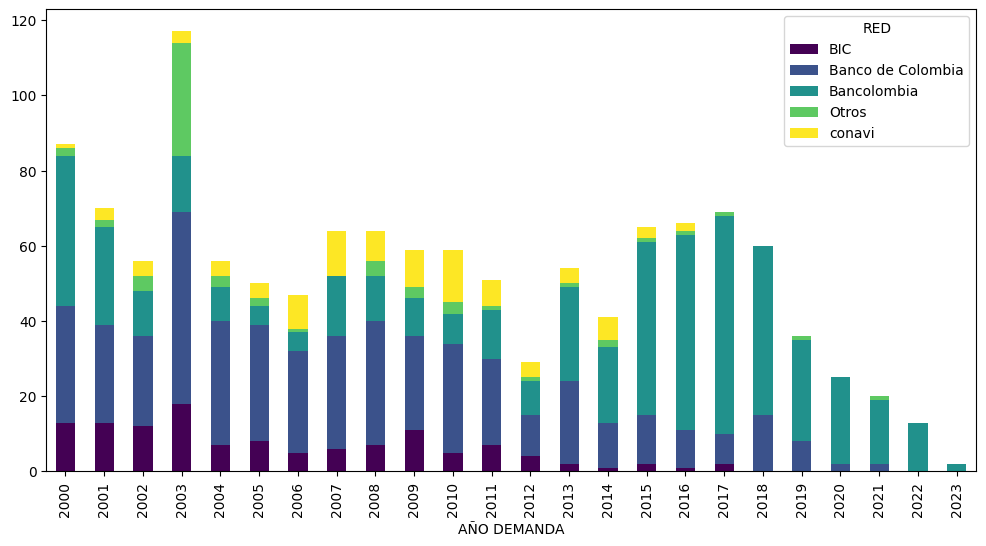

In [11873]:
#Analizamos también AÑO DEMANDA por RED, con un tipo de grafico de barras apiladas de forma vertical
df.groupby(['AÑO DEMANDA', 'RED']).size().unstack().plot(kind='bar', stacked=True, figsize=(12,6), colormap='viridis')


<Axes: xlabel='AÑO DEMANDA'>

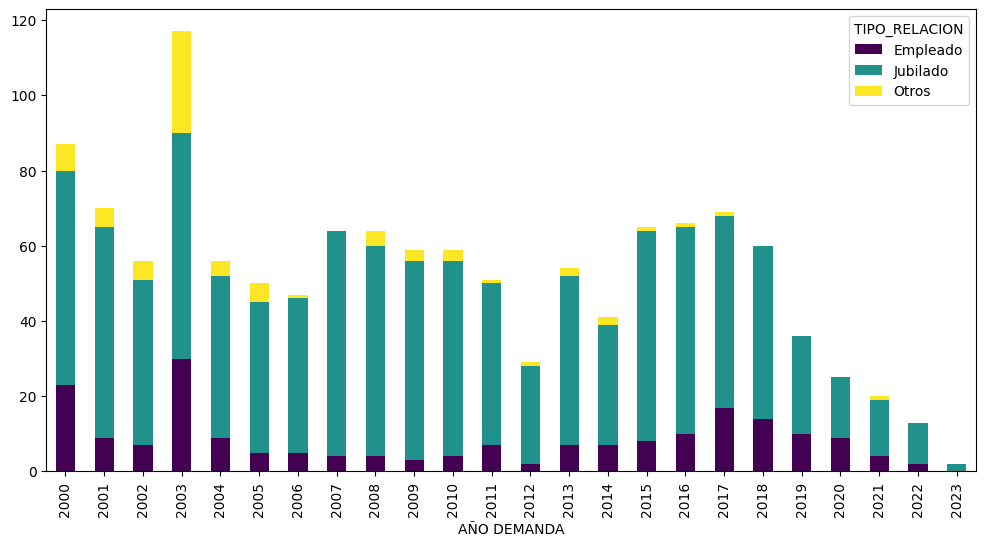

In [11874]:
#gráfica donde se relacione el AÑO DEMANDA por TIPO RELACIÓN y REGIÓN
df.groupby(['AÑO DEMANDA', 'TIPO_RELACION']).size().unstack().plot(kind='bar', stacked=True, figsize=(12,6), colormap='viridis')

Se evidencia claramente que las demandas están focalizadas en el tipo de relación Jubilado.

<Figure size 1200x600 with 0 Axes>

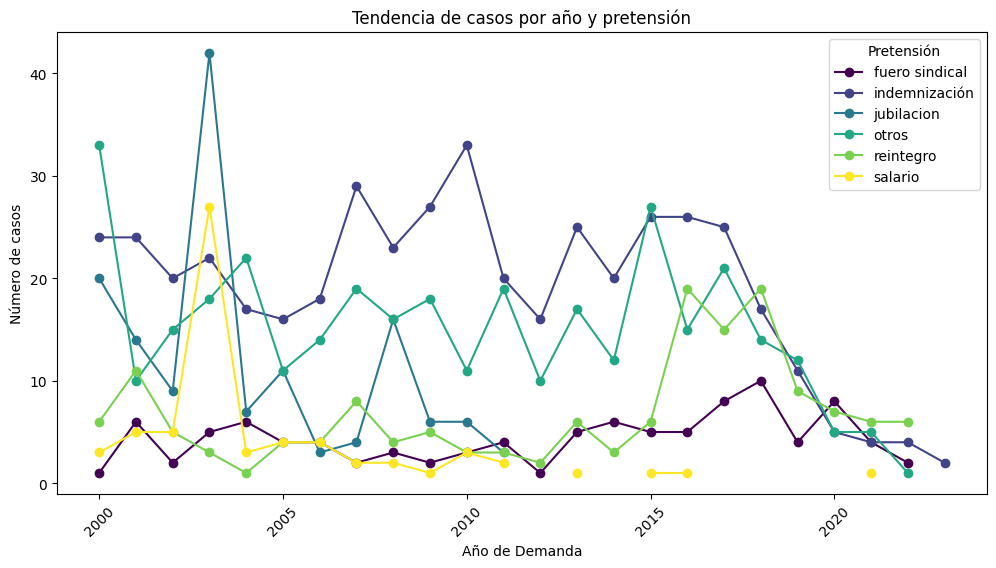

In [11875]:
#Grafico lineal historico por tipo de pretencion
plt.figure(figsize=(12,6))
df.groupby(['AÑO DEMANDA', 'PRETENSIÓN']).size().unstack().plot(kind='line', marker='o', figsize=(12,6), colormap='viridis')
plt.title('Tendencia de casos por año y pretensión')
plt.xlabel('Año de Demanda')
plt.ylabel('Número de casos')
plt.xticks(rotation=45)
plt.legend(title='Pretensión')
plt.show()

In [11876]:
#Eliminamos el campo de año
df = df.drop(columns=['AÑO DEMANDA'])

In [11877]:
# Revisamos el dataset final
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1260 entries, 11 to 1693
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TIPO_DE_PROCESO  1260 non-null   object
 1   CIUDAD           1260 non-null   object
 2   REGION           1260 non-null   object
 3   RED              1260 non-null   object
 4   TIPO_RELACION    1260 non-null   object
 5   PRETENSIÓN       1260 non-null   object
 6   CLASE            1260 non-null   object
 7   ESTADO_ACTUAL    1260 non-null   object
dtypes: object(8)
memory usage: 88.6+ KB


,TIPO_DE_PROCESO,CIUDAD,REGION,RED,TIPO_RELACION,PRETENSIÓN,CLASE,ESTADO_ACTUAL
11,Ordinario,bogota,Bogotá,Bancolombia,Jubilado,indemnización,probable,conciliado
86,Ordinario,bogota,Bogotá,Bancolombia,Jubilado,otros,probable,favorable
226,Ordinario,palmira,Sur,Bancolombia,Jubilado,otros,probable,conciliado
244,Ordinario,sincelejo,Caribe,Bancolombia,Jubilado,otros,probable,favorable
247,Ordinario,medellin,Antioquia,Bancolombia,Jubilado,jubilacion,probable,favorable


In [11878]:
#Conocemos el dataset final:
df.head()

,TIPO_DE_PROCESO,CIUDAD,REGION,RED,TIPO_RELACION,PRETENSIÓN,CLASE,ESTADO_ACTUAL
11,Ordinario,bogota,Bogotá,Bancolombia,Jubilado,indemnización,probable,conciliado
86,Ordinario,bogota,Bogotá,Bancolombia,Jubilado,otros,probable,favorable
226,Ordinario,palmira,Sur,Bancolombia,Jubilado,otros,probable,conciliado
244,Ordinario,sincelejo,Caribe,Bancolombia,Jubilado,otros,probable,favorable
247,Ordinario,medellin,Antioquia,Bancolombia,Jubilado,jubilacion,probable,favorable


In [11879]:

df.head()

,TIPO_DE_PROCESO,CIUDAD,REGION,RED,TIPO_RELACION,PRETENSIÓN,CLASE,ESTADO_ACTUAL
11,Ordinario,bogota,Bogotá,Bancolombia,Jubilado,indemnización,probable,conciliado
86,Ordinario,bogota,Bogotá,Bancolombia,Jubilado,otros,probable,favorable
226,Ordinario,palmira,Sur,Bancolombia,Jubilado,otros,probable,conciliado
244,Ordinario,sincelejo,Caribe,Bancolombia,Jubilado,otros,probable,favorable
247,Ordinario,medellin,Antioquia,Bancolombia,Jubilado,jubilacion,probable,favorable


### 2.  Crea más features

In [11880]:
# Crear nuevas features en df

# 1. Feature: Es ciudad principal (top 10)
df['ES_CIUDAD_PRINCIPAL'] = df['CIUDAD'].isin(top_10_ciudades).astype(int)


#2. Feature: Pretensión principal (1 si es clase principal, 0 si es 'otros')
clases_pretension = ['indemnización', 'reintegro', 'jubilacion', 'fuero sindical', 'salario']
df['PRETENSION_PRINCIPAL'] = df['PRETENSIÓN'].isin(clases_pretension).astype(int)

# 3. Feature: Estado actual principal (1 si está en clases_principales, 0 si es 'otros')
df['ESTADO_ACTUAL_PRINCIPAL'] = df['ESTADO_ACTUAL'].isin(clases_principales).astype(int)

# 4. Feature: Relación Jubilado
df['ES_JUBILADO'] = (df['TIPO_RELACION'] == 'Jubilado').astype(int)

# 5. Crear la nueva feature 'decision' en df
exito = ['favorable', 'contestada', 'liquidación', 'terminado', 'conciliado', 'resuelto', 'primera instancia', 'radica contestacion']
fracaso = ['pendiente', 'fallo 2a instancia', 'segunda instancia', 'neutro']

def clasificar_decision(estado):
    if estado in exito:
        return 'exito'
    elif estado in fracaso:
        return 'fracaso'
    elif estado == 'otros':
        return 'otros'
    else:
        return 'otros'

df['DECISION'] = df['ESTADO_ACTUAL'].apply(clasificar_decision)



In [11881]:
# Mostrar las nuevas columnas
df.head()

,TIPO_DE_PROCESO,CIUDAD,REGION,RED,TIPO_RELACION,PRETENSIÓN,CLASE,ESTADO_ACTUAL,ES_CIUDAD_PRINCIPAL,PRETENSION_PRINCIPAL,ESTADO_ACTUAL_PRINCIPAL,ES_JUBILADO,DECISION
11,Ordinario,bogota,Bogotá,Bancolombia,Jubilado,indemnización,probable,conciliado,1,1,1,1,exito
86,Ordinario,bogota,Bogotá,Bancolombia,Jubilado,otros,probable,favorable,1,0,1,1,exito
226,Ordinario,palmira,Sur,Bancolombia,Jubilado,otros,probable,conciliado,0,0,1,1,exito
244,Ordinario,sincelejo,Caribe,Bancolombia,Jubilado,otros,probable,favorable,0,0,1,1,exito
247,Ordinario,medellin,Antioquia,Bancolombia,Jubilado,jubilacion,probable,favorable,1,1,1,1,exito


In [11882]:
# Quitar el índice del DataFrame df y resetearlo
df = df.reset_index(drop=True)

In [11883]:
df.head()

,TIPO_DE_PROCESO,CIUDAD,REGION,RED,TIPO_RELACION,PRETENSIÓN,CLASE,ESTADO_ACTUAL,ES_CIUDAD_PRINCIPAL,PRETENSION_PRINCIPAL,ESTADO_ACTUAL_PRINCIPAL,ES_JUBILADO,DECISION
0,Ordinario,bogota,Bogotá,Bancolombia,Jubilado,indemnización,probable,conciliado,1,1,1,1,exito
1,Ordinario,bogota,Bogotá,Bancolombia,Jubilado,otros,probable,favorable,1,0,1,1,exito
2,Ordinario,palmira,Sur,Bancolombia,Jubilado,otros,probable,conciliado,0,0,1,1,exito
3,Ordinario,sincelejo,Caribe,Bancolombia,Jubilado,otros,probable,favorable,0,0,1,1,exito
4,Ordinario,medellin,Antioquia,Bancolombia,Jubilado,jubilacion,probable,favorable,1,1,1,1,exito


In [11884]:
# Exportar el DataFrame df a un archivo Excel
df.to_excel('datos_limpios.xlsx', index=False)

In [11885]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   TIPO_DE_PROCESO          1260 non-null   object
 1   CIUDAD                   1260 non-null   object
 2   REGION                   1260 non-null   object
 3   RED                      1260 non-null   object
 4   TIPO_RELACION            1260 non-null   object
 5   PRETENSIÓN               1260 non-null   object
 6   CLASE                    1260 non-null   object
 7   ESTADO_ACTUAL            1260 non-null   object
 8   ES_CIUDAD_PRINCIPAL      1260 non-null   int64 
 9   PRETENSION_PRINCIPAL     1260 non-null   int64 
 10  ESTADO_ACTUAL_PRINCIPAL  1260 non-null   int64 
 11  ES_JUBILADO              1260 non-null   int64 
 12  DECISION                 1260 non-null   object
dtypes: int64(4), object(9)
memory usage: 128.1+ KB


### 3. Define split de datos

In [11886]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["DECISION"]), df["DECISION"], test_size=0.2, random_state=42)

### 4. Crea un pipeline de procesamiento y train

Las variables numericas decidimos:

1. Imputar con mediana... pero podria ser con 0, con promedio, con moda... probemos
2. Usar standardscaler, pero podemos usar cualquier tipo de estandarización

In [11887]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder



# Definir las variables numericas y categorias
numeric_features = ['ES_CIUDAD_PRINCIPAL', 'PRETENSION_PRINCIPAL', 'ESTADO_ACTUAL_PRINCIPAL', 
                   'ES_JUBILADO']

# Create preprocessing pipelines for each data type
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

Las variables categoricas decidimos:

1. Imputar con "other", que significa que quiero agrupar lo desconocido en una variable generica
2. Usar OneHotEncoder

In [11888]:
categorical_features = ['TIPO_DE_PROCESO', 'REGION', 'RED', 'TIPO_RELACION', 'PRETENSIÓN', 'CLASE']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='other')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

Adicional tengo 2 variables que tienen muchas clases y no es recomendado realizar OneHotEncoder sino otro método, para eso creamos el pipeline

In [11889]:
categorical_high = ['CIUDAD', 'ESTADO_ACTUAL']

categorical_high_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Other')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

 Unimos las transformaciones en un ColumnTransformer para aplicarselo a todo el df

In [11890]:
# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('cat2', categorical_high_transformer, categorical_high)
    ],
    remainder='drop'  # Drop any columns not specified above
)

Usamos el column transformer y luego entrenamos una regresión logistica. 

In [11891]:
# Create the full pipeline
pipeline_train_cont = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

In [11892]:
# Fit the pipeline
pipeline_train_cont.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Realizamos las respectivas predcciones:

In [11893]:

# Make predictions
y_pred = pipeline_train_cont.predict(X_test)
y_pred_proba = pipeline_train_cont.predict_proba(X_test)[:, 1]

Estas son las metricas

In [11894]:
from sklearn.metrics import classification_report, roc_auc_score

# Probabilidades de todas las clases
y_pred_proba = pipeline_train_cont.predict_proba(X_test)

# ROC AUC para multiclase
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class="ovr", average="weighted")
print("ROC-AUC Score (weighted):", roc_auc)

# Reporte de clasificación
y_pred = pipeline_train_cont.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

ROC-AUC Score (weighted): 0.9559233205066539

Classification Report:
              precision    recall  f1-score   support

       exito       0.86      0.87      0.87       108
     fracaso       0.74      0.72      0.73        54
       otros       1.00      1.00      1.00        90

    accuracy                           0.88       252
   macro avg       0.87      0.86      0.87       252
weighted avg       0.88      0.88      0.88       252

